# Using request library to download the data. Storing that JSON file in midterm/data/Archive folder

In [204]:
import pylab as plt
from bs4 import BeautifulSoup
from collections import Counter
from nltk.tokenize import word_tokenize
import requests
import json
import os
import csv
import re


In [205]:

relativePath = os.getcwd()

apiKey = 'e31bc7e0e6ae4eaa88ce8784982924db'
year = 2014
month = 11 #taking a sample dataset

url = "https://api.nytimes.com/svc/archive/v1/"+str(year)+"/"+str(month)+".json?api-key="+apiKey
response = requests.get(url)
content  = response.json()

with open(relativePath+"/"+'midterm/data/jsonData'+"/"+str(month)+"-"+str(year)+'.json', 'w') as file:
    json.dump(content, file)#loading the dataset

5206
[(None, 2775), ('Politics', 451), ('Europe', 148), ('Asia Pacific', 143), ('DealBook', 136), ('Music', 124), ('Television', 121), ('Book Review', 105), ('Art & Design', 87), ('Middle East', 78)]


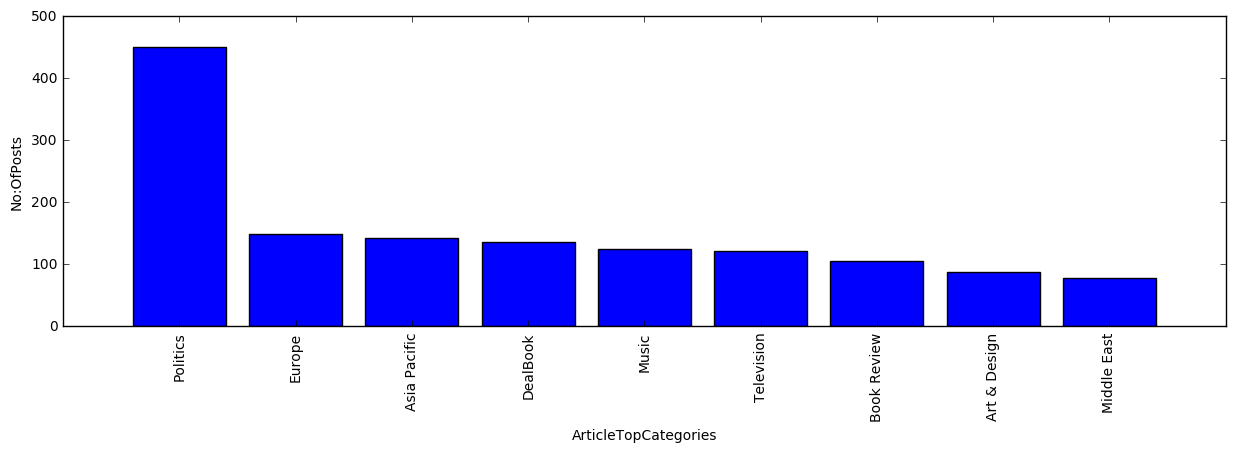

In [206]:

path = relativePath+"/"+'midterm/data/Archive/jsonData'
#category wise analysisng the data
def getArticles(file, category):
    config = json.loads(open(file).read())
    for x in range(len(config['response']['docs'])):
        section = config['response']['docs'][x]['subsection_name']
        category.append(section)

    #we have to append all the article to list
    

category = []
for directory, subDirectory, filename in os.walk(path):
    for file in filename:
        getArticles(os.path.join(directory, file), category)

print(len(category))

fcount={} 
#by looping we are getting the count of every word and storing in Dictionary.

for word in category:
    count = fcount.get(word,0)
    fcount[word] = count + 1

sortedDict = sorted(fcount.items(), key=lambda x: (-x[1], x[0])) 
print(sortedDict[:10])


i = 0
oredering = []

for rank in range(len(sortedDict)):
    obj1 = sortedDict[rank]
    obj1 = obj1 + (i,)
    oredering.append(obj1) # we are giving rank to every section
    i = i+1

fileName = relativePath+"/"+'midterm/NYTS.csv'

# Writing the data in to CSV file and storing in D drive.
with open(fileName, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["Category", "Count"])
    a.writerows(oredering[:10])


label = []
y = []
z = []

with open(fileName,'r') as csvfile:
    next(csvfile)
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        label.append(row[0])
        y.append(int(row[1]))
        z.append(int(row[2]))
        

pieFig = relativePath+"/"+'midterm/Analysis2.png'

plt.figure(figsize=(15,4))
plt.bar(z, y, align='center')
plt.xticks(z, label, rotation=90)
plt.xlabel("ArticleTopCategories")
plt.ylabel("No:OfPosts")
plt.savefig(pieFig, bbox_inches='tight')
plt.show()
